In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
parent_dir = '/mnt/d/Downloads/kagglE/g2net-gravitational-wave-detection/'

In [3]:
training_labels = pd.read_csv(parent_dir + 'training_labels.csv')
sample_submission = pd.read_csv(parent_dir + 'sample_submission.csv')

In [4]:
training_labels.head()

,id,target
0,00000e74ad,1
1,00001f4945,0
2,0000661522,0
3,00007a006a,0
4,0000a38978,1


In [5]:
sample_submission.head()

,id,target
0,00005bced6,0.5
1,0000806717,0.5
2,0000ef4fe1,0.5
3,00020de251,0.5
4,00024887b5,0.5


In [6]:
def idx2path(idx, is_train=True):
    path = parent_dir
    
    if is_train:
        path += 'train/' + idx[0] +'/'+ idx[1] +'/'+ idx[2] +'/'+ idx +'.npy'
    else:
        path += 'test/' + idx[0] +'/'+ idx[1] +'/'+ idx[2] +'/'+ idx +'.npy'
    return path 

In [7]:
path = training_labels['id'].apply(idx2path)

In [8]:
path 

0         /mnt/d/Downloads/kagglE/g2net-gravitational-wa...
1         /mnt/d/Downloads/kagglE/g2net-gravitational-wa...
2         /mnt/d/Downloads/kagglE/g2net-gravitational-wa...
3         /mnt/d/Downloads/kagglE/g2net-gravitational-wa...
4         /mnt/d/Downloads/kagglE/g2net-gravitational-wa...
                                ...                        
559995    /mnt/d/Downloads/kagglE/g2net-gravitational-wa...
559996    /mnt/d/Downloads/kagglE/g2net-gravitational-wa...
559997    /mnt/d/Downloads/kagglE/g2net-gravitational-wa...
559998    /mnt/d/Downloads/kagglE/g2net-gravitational-wa...
559999    /mnt/d/Downloads/kagglE/g2net-gravitational-wa...
Name: id, Length: 560000, dtype: object

In [14]:
from nnAudio.Spectrogram import CQT1992v2
from PIL import Image 
import torch 
from sklearn.preprocessing import MinMaxScaler

def increase_dimension(path,transform=CQT1992v2(sr=2048, fmin=20, fmax=1024, hop_length=64)): # in order to use efficientnet we need 3 dimension images
    data = np.load(path)
    d1 = torch.from_numpy(data[0]).float()
    d2 = torch.from_numpy(data[1]).float()
    d3 = torch.from_numpy(data[2]).float()
    d1 = transform(d1)
    d2 = transform(d2)
    d3 = transform(d3)
    img = np.zeros([d1.shape[1], d1.shape[2], 3], dtype=np.uint8)
    scaler = MinMaxScaler()
    img[:,:,0] = 255*scaler.fit_transform(d1.reshape(d1.shape[1],d1.shape[2]))
    img[:,:,1] = 255*scaler.fit_transform(d2.reshape(d2.shape[1],d2.shape[2]))
    img[:,:,2] = 255*scaler.fit_transform(d3.reshape(d3.shape[1],d3.shape[2]))
    return Image.fromarray(img).rotate(90, expand=1).resize((256,256))

CQT kernels created, time used = 0.0152 seconds


/home/shambhu/miniconda3/envs/work_env/lib/python3.9/site-packages/nnAudio/utils.py:326: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn('If fmax is given, n_bins will be ignored',SyntaxWarning)


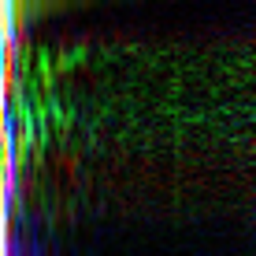

In [15]:
increase_dimension(path[5])